In [1]:
conda install -c anaconda netcdf4

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for r-workflows r-rcurl r-memoise r-ggplot2 r-prettyunits r-- 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Examining conflict for r-readxl r-reshape2 r-openssl r-covr r-tseries r-gower / 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
import netCDF4 as nc4


In [19]:
from netCDF4 import Dataset
import numpy as np

my_example_nc_file = '21_11_2020.nc'
fh = Dataset(my_example_nc_file, mode='r')
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: f58463a2-e4e8-417f-8d55-9dcb0f05a5ee
    id: S5P_OFFL_L2__NO2____20201121T110841_20201121T125011_16104_01_010302_20201123T043702
    time_reference: 2020-11-21T00:00:00Z
    time_reference_days_since_1950: 25892
    time_reference_julian_day: 2459174.5
    time_reference_seconds_since_1970: 1605916800
    time_coverage_start: 2020-11-21T11:30:16Z
    time_coverage_end: 2020-11-21T12:28:39Z
    time_coverage_duration: PT3503.562S
    time_coverage_resolution: PT0.840S
    orbit: 16104
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.3.2
    keywords_vocabulary: AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
    keywords: 0345 Pollution, 

In [20]:
print (fh.groups)

print (fh.groups['PRODUCT'])

{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(4172), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time, scanline, ground_pix

In [21]:
print (fh.groups['PRODUCT'].variables.keys())

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [22]:
print (fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'])

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide standard_error
    long_name: Precision of the tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    multiplication_factor_to_convert_to_molecules_percm2: 6.022141e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4172, 450)
filling on


In [23]:
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)


no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units

(4172, 450)
(4172, 450)
(4172, 450)


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

<ipython-input-25-71b8f21e4fbd>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')


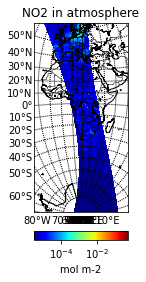

In [25]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=10000000,height=20000000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')

# Add Grid Lines
m.drawparallels(np.arange(-80, 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title('NO2 in atmosphere')
plt.show()